In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
import warnings
from statsmodels.tools.eval_measures import rmse
from fbprophet.plot import add_changepoints_to_plot

In [18]:
warnings.filterwarnings('ignore')

In [19]:
data=pd.read_csv('IPG211111CN.csv').round(2)

In [20]:
data.head()

,DATE,IPG211111CN
0,1972-01-01,141.51
1,1972-02-01,145.17
2,1972-03-01,147.29
3,1972-04-01,148.22
4,1972-05-01,149.78


In [21]:
data.columns=['ds','y']
data['ds']=pd.to_datetime(data['ds'])

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 2 columns):
ds    568 non-null datetime64[ns]
y     568 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.0 KB


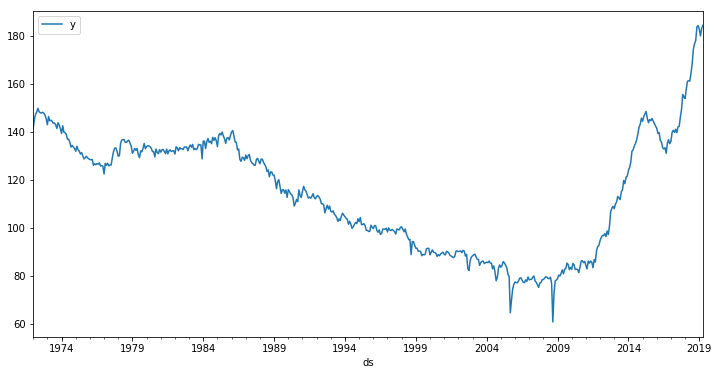

In [23]:
data.plot(figsize=(12,6),x='ds',y='y')

In [24]:
train=data.iloc[:556]
test=data.iloc[556:]

In [25]:
crude=Prophet()
crude.fit(train)
future=crude.make_future_dataframe(12,freq='MS')
forecast=crude.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [26]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1972-01-01,146.854320,141.452055,152.550051,146.854320,146.854320,0.107527,0.107527,0.107527,0.107527,0.107527,0.107527,0.0,0.0,0.0,146.961847
1,1972-02-01,146.527343,141.453313,152.948176,146.527343,146.527343,0.632175,0.632175,0.632175,0.632175,0.632175,0.632175,0.0,0.0,0.0,147.159518
2,1972-03-01,146.221462,141.263726,152.549768,146.221462,146.221462,0.765935,0.765935,0.765935,0.765935,0.765935,0.765935,0.0,0.0,0.0,146.987397
3,1972-04-01,145.894485,140.763237,151.496226,145.894485,145.894485,0.363770,0.363770,0.363770,0.363770,0.363770,0.363770,0.0,0.0,0.0,146.258255
4,1972-05-01,145.578055,140.671449,151.759470,145.578055,145.578055,0.502202,0.502202,0.502202,0.502202,0.502202,0.502202,0.0,0.0,0.0,146.080258
5,1972-06-01,145.251078,139.342661,150.211596,145.251078,145.251078,-0.308489,-0.308489,-0.308489,-0.308489,-0.308489,-0.308489,0.0,0.0,0.0,144.942590
6,1972-07-01,144.934649,138.869427,150.050934,144.934649,144.934649,-0.390985,-0.390985,-0.390985,-0.390985,-0.390985,-0.390985,0.0,0.0,0.0,144.543664
7,1972-08-01,144.607672,138.107092,149.420378,144.607672,144.607672,-1.023214,-1.023214,-1.023214,-1.023214,-1.023214,-1.023214,0.0,0.0,0.0,143.584458
8,1972-09-01,144.280695,137.072921,148.083650,144.280695,144.280695,-1.809730,-1.809730,-1.809730,-1.809730,-1.809730,-1.809730,0.0,0.0,0.0,142.470965
9,1972-10-01,143.964266,138.252525,149.607024,143.964266,143.964266,-0.273564,-0.273564,-0.273564,-0.273564,-0.273564,-0.273564,0.0,0.0,0.0,143.690702


In [29]:
prediction=forecast[-12:]['yhat']
rmse(prediction,test['y'])

15.75445809633732

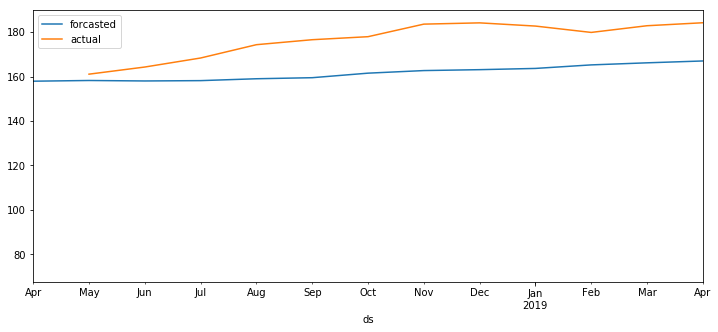

In [32]:
ax=forecast.plot(x='ds',y='yhat',label='forcasted',figsize=(12,5))
test.plot(x='ds',y='y',ax=ax,label='actual',xlim=('2018-04-01','2019-04-01'))

In [33]:
crude1=Prophet(seasonality_mode='multiplicative')
crude1.fit(train)
future1=crude1.make_future_dataframe(12,freq='MS')
forecast1=crude1.predict(future1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [34]:
prediction1=forecast1[-12:]['yhat']
rmse(prediction1,test['y'])

15.577087675889885

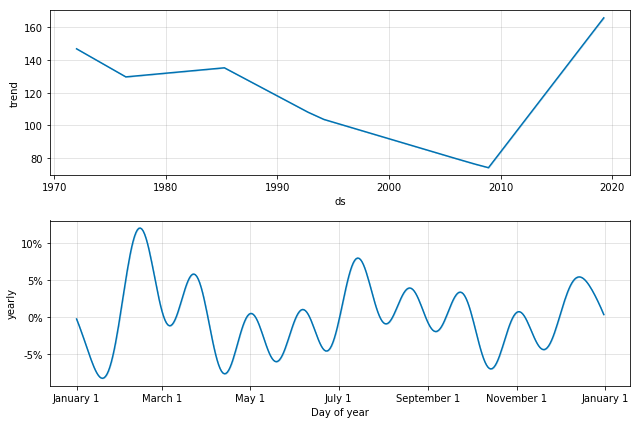

In [37]:
fig=crude1.plot_components(forecast1)

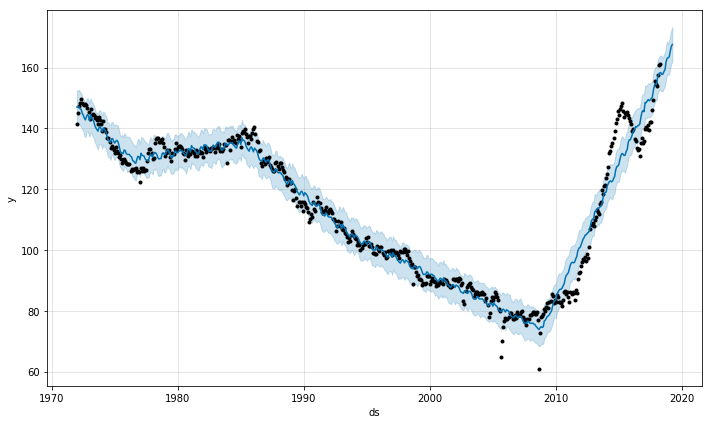

In [38]:
fig=crude1.plot(forecast1)

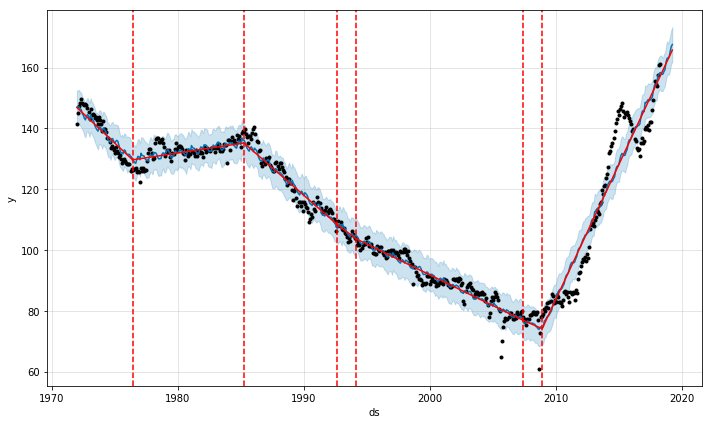

In [40]:
fig=crude1.plot(forecast1)
a=add_changepoints_to_plot(fig.gca(),crude1,forecast1)

In [41]:
crude1=Prophet(seasonality_mode='multiplicative')
crude1.fit(data)
future1=crude1.make_future_dataframe(12,freq='MS')
forecast1=crude1.predict(future1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [43]:
forecast1.iloc[568:]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
568,2019-05-01,172.928182,167.419956,178.705077,172.928182,172.928182,0.000883,0.000883,0.000883,0.000883,0.000883,0.000883,0.0,0.0,0.0,173.080916
569,2019-06-01,173.772180,166.641050,178.169095,173.772180,173.772180,-0.007052,-0.007052,-0.007052,-0.007052,-0.007052,-0.007052,0.0,0.0,0.0,172.546784
570,2019-07-01,174.588952,167.008068,178.445933,174.588952,174.588952,-0.010162,-0.010162,-0.010162,-0.010162,-0.010162,-0.010162,0.0,0.0,0.0,172.814777
571,2019-08-01,175.432949,168.693498,180.655805,175.432949,175.432949,-0.004983,-0.004983,-0.004983,-0.004983,-0.004983,-0.004983,0.0,0.0,0.0,174.558775
572,2019-09-01,176.276947,169.585733,180.743508,176.274695,176.276947,-0.004909,-0.004909,-0.004909,-0.004909,-0.004909,-0.004909,0.0,0.0,0.0,175.411545
573,2019-10-01,177.093719,172.472924,184.244862,177.074928,177.099326,0.005847,0.005847,0.005847,0.005847,0.005847,0.005847,0.0,0.0,0.0,178.129212
574,2019-11-01,177.937716,174.069464,185.103211,177.893039,177.976631,0.008063,0.008063,0.008063,0.008063,0.008063,0.008063,0.0,0.0,0.0,179.372449
575,2019-12-01,178.754488,173.252855,185.460821,178.670324,178.853864,0.002750,0.002750,0.002750,0.002750,0.002750,0.002750,0.0,0.0,0.0,179.246076
576,2020-01-01,179.598486,174.040329,185.787910,179.478248,179.755258,0.002147,0.002147,0.002147,0.002147,0.002147,0.002147,0.0,0.0,0.0,179.984168
577,2020-02-01,180.442483,174.925541,186.735038,180.274901,180.644822,0.002088,0.002088,0.002088,0.002088,0.002088,0.002088,0.0,0.0,0.0,180.819185


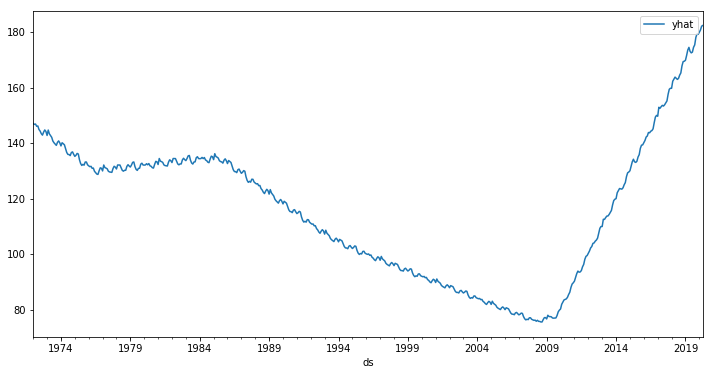

In [48]:
forecast1.plot(x='ds',y='yhat',figsize=(12,6))